In [3]:
from rdflib import Graph
from SPARQLWrapper import SPARQLWrapper, JSON, N3
from pprint import pprint 

### User input

In [4]:
goal = input('I want to learn about ')

I want to learn about machine learning


### Define Domain

In [5]:
sparql = SPARQLWrapper('https://dbpedia.org/sparql')
query = '''
    SELECT ?object
    WHERE {{ dbr:{0} dbo:abstract ?object .}} 
'''.format(goal.capitalize().replace(' ', '_'))
sparql.setQuery(query)
print(query)


    SELECT ?object
    WHERE { dbr:Machine_learning dbo:abstract ?object .} 



### Print Summary

In [6]:
sparql.setReturnFormat(JSON)
qres = sparql.query().convert()

for result in qres['results']['bindings']:
    lang, value = result['object']['xml:lang'], result['object']['value']
    if lang == 'en':
        print(value)

Machine learning (ML) is the study of computer algorithms that improve automatically through experience. It is seen as a subset of artificial intelligence. Machine learning algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so. Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks. Machine learning is closely related to computational statistics, which focuses on making predictions using computers. The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning. In its application across business problems, machine learning is also referred to as p

### Construct Generalized Curriculum Graph

In [7]:
sparql = SPARQLWrapper('https://dbpedia.org/sparql')
sparql.setQuery('''
CONSTRUCT { dbc:Machine_learning skos:broader ?parent .
            dbc:Machine_learning skos:narrower ?child .}
WHERE {
    { dbc:Machine_learning skos:broader ?parent . }
UNION 
    { ?child skos:broader dbc:Machine_learning . }
}
''')

sparql.setReturnFormat(N3)
qres = sparql.query().convert()

g = Graph()
g.parse(data=qres, format='n3')
g_str = g.serialize(format='ttl').decode('u8')
print(g_str)

@prefix dbc: <http://dbpedia.org/resource/Category:> .
@prefix skos: <http://www.w3.org/2004/02/skos/core#> .

dbc:Machine_learning skos:broader dbc:Artificial_intelligence,
        dbc:Learning ;
    skos:narrower dbc:Applied_machine_learning,
        dbc:Artificial_intelligence_conferences,
        dbc:Artificial_neural_networks,
        dbc:Bayesian_networks,
        dbc:Classification_algorithms,
        dbc:Cluster_analysis,
        dbc:Computational_learning_theory,
        dbc:Data_mining_and_machine_learning_software,
        dbc:Datasets_in_machine_learning,
        dbc:Deep_learning,
        dbc:Dimension_reduction,
        dbc:Ensemble_learning,
        dbc:Evolutionary_algorithms,
        dbc:Genetic_programming,
        dbc:Inductive_logic_programming,
        dbc:Kernel_methods_for_machine_learning,
        dbc:Latent_variable_models,
        dbc:Learning_in_computer_vision,
        dbc:Log-linear_models,
        dbc:Loss_functions,
        dbc:Machine_learning_algorithms

### Data Wrangling

In [50]:
import re 

arr = re.split(',|;|dbc:|skos:', g_str.replace('\n', '').replace(' ', '').replace('.', ''))
print(arr)
print('---------------------\n')
topic_list = [x for x in arr if 'http' not in x and x != '']    
broad_idx = topic_list.index('broader')
narrow_idx = topic_list.index('narrower')
main_topic = topic_list[1].replace('_', ' ')
broad = [x.replace('_', ' ') for x in topic_list if topic_list.index(x) > broad_idx and topic_list.index(x) < narrow_idx]
narrow = [x.replace('_', ' ') for x in topic_list if topic_list.index(x) > narrow_idx]

print('\nbroad\n---------------------')
for a in broad:
    print(a)
print('\nnarrow\n---------------------')
for a in narrow:
    print(a) 

['@prefix', '<http://dbpediaorg/resource/Category:>@prefix', '<http://wwww3org/2004/02/skos/core#>', 'Machine_learning', 'broader', 'Artificial_intelligence', '', 'Learning', '', 'narrower', 'Applied_machine_learning', '', 'Artificial_intelligence_conferences', '', 'Artificial_neural_networks', '', 'Bayesian_networks', '', 'Classification_algorithms', '', 'Cluster_analysis', '', 'Computational_learning_theory', '', 'Data_mining_and_machine_learning_software', '', 'Datasets_in_machine_learning', '', 'Deep_learning', '', 'Dimension_reduction', '', 'Ensemble_learning', '', 'Evolutionary_algorithms', '', 'Genetic_programming', '', 'Inductive_logic_programming', '', 'Kernel_methods_for_machine_learning', '', 'Latent_variable_models', '', 'Learning_in_computer_vision', '', 'Log-linear_models', '', 'Loss_functions', '', 'Machine_learning_algorithms', '', 'Machine_learning_researchers', '', 'Machine_learning_task', '', 'Markov_models', '<http://dbpediaorg/resource/Category:Ontology_learning_(c

In [57]:
narrow

['Applied machine learning',
 'Artificial intelligence conferences',
 'Artificial neural networks',
 'Bayesian networks',
 'Classification algorithms',
 'Cluster analysis',
 'Computational learning theory',
 'Data mining and machine learning software',
 'Datasets in machine learning',
 'Deep learning',
 'Dimension reduction',
 'Ensemble learning',
 'Evolutionary algorithms',
 'Genetic programming',
 'Inductive logic programming',
 'Kernel methods for machine learning',
 'Latent variable models',
 'Learning in computer vision',
 'Log-linear models',
 'Loss functions',
 'Machine learning algorithms',
 'Machine learning researchers',
 'Machine learning task',
 'Markov models',
 'Reinforcement learning',
 'Semisupervised learning',
 'Signal processing conferences',
 'Statistical natural language processing',
 'Structured prediction',
 'Supervised learning',
 'Support vector machines',
 'Unsupervised learning']

### Network representation of goal and domain template

In [97]:
import networkx as nx
%matplotlib inline 

import matplotlib.pyplot as plt
G = nx.Graph()
G.add_node(goal)

G.add_edges_from([(goal,a) for a in narrow[0:]])

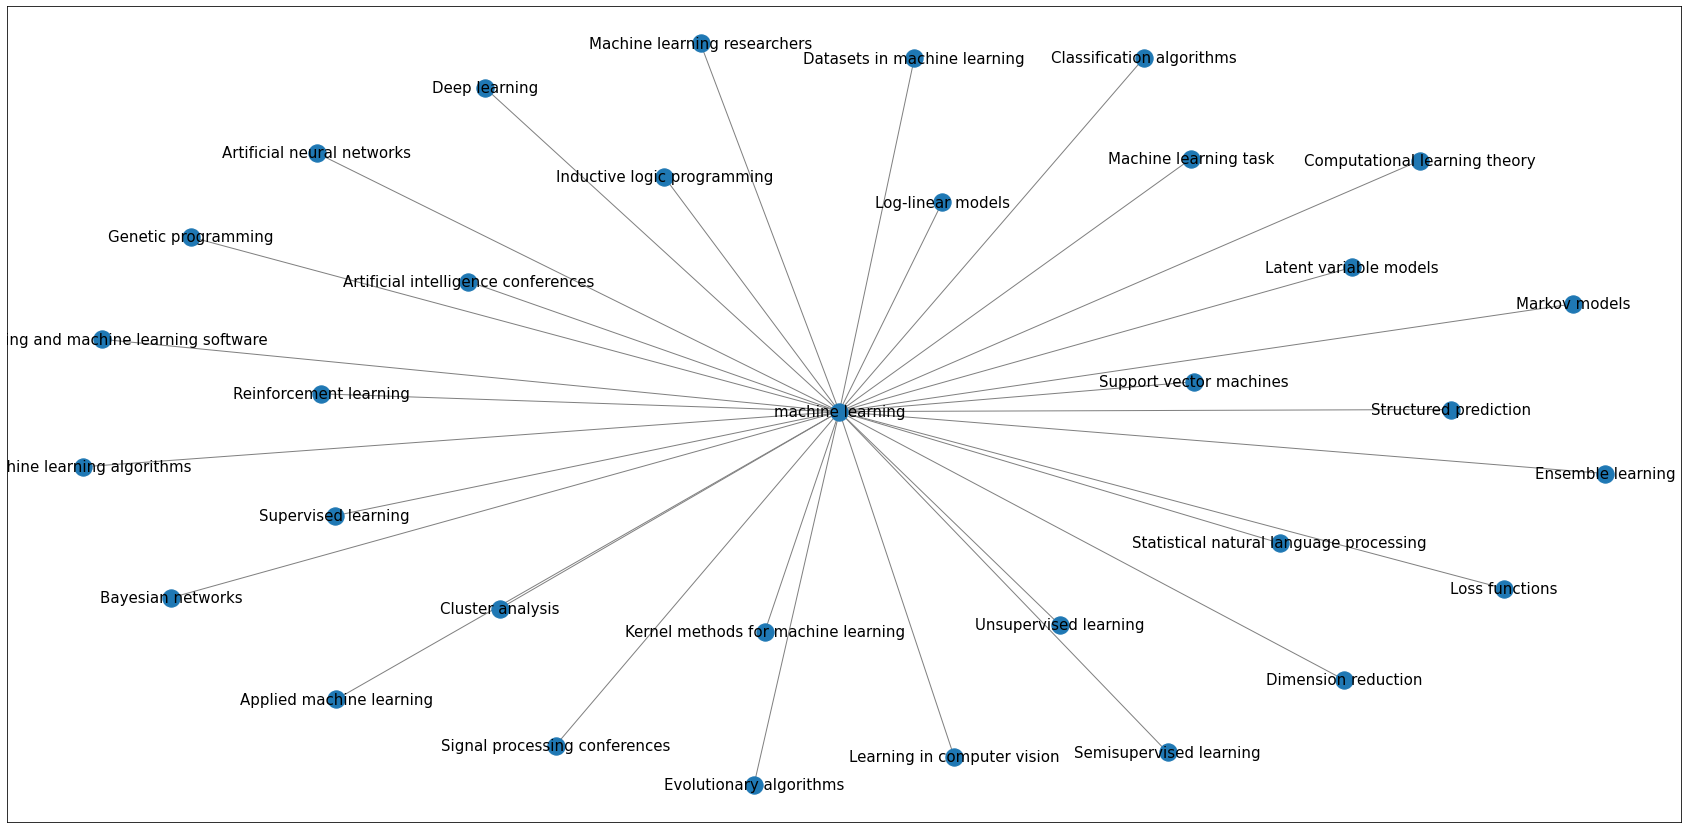

In [98]:
fig, ax = plt.subplots(figsize=(30, 15))

# Plot networks
nx.draw_networkx(G,
                 font_size=15,
                 width=1,
                 edge_color='grey',
                 with_labels = True,
                 ax=ax)


### Web Scraping (Google search)
- googlesearch-python

In [7]:
import requests
import bs4
from googlesearch import search

top_10 = search(main_topic, num_results=10, lang='en')
for j in top_10:
    print(j)
    print('\n')

https://www.sas.com/en_us/insights/analytics/machine-learning.html


https://www.sas.com/en_us/insights/analytics/machine-learning.html


https://en.wikipedia.org/wiki/Machine_learning


https://www.coursera.org/learn/machine-learning


https://www.expert.ai/blog/machine-learning-definition/


https://developers.google.com/machine-learning/crash-course


https://www.geeksforgeeks.org/machine-learning/


https://searchenterpriseai.techtarget.com/definition/machine-learning-ML


https://www.ibm.com/cloud/learn/machine-learning


https://aws.amazon.com/machine-learning/


/search?q=Machine+learning&num=11&hl=en&tbm=isch&source=iu&ictx=1&fir=jJagNU8tZ2wF4M%252CBwMswl4yZQIR8M%252C%252Fm%252F01hyh_&vet=1&usg=AI4_-kSmU5QY08UZxOW_nEGPvrI9hFr2gA&sa=X&ved=2ahUKEwjH-KvFipvxAhV0MX0KHZ0VCdcQ_B16BAgyEAE#imgrc=jJagNU8tZ2wF4M




### Web Scraping (Extract Text)
- beautifulsoup4

In [10]:
def extract_text(url):
    pass
    # TODO: Write methods to extract text from a given url 

### Relevance Algorithm 1: Word Frequency 

In [11]:
def extract_word_count(page, word):
    pass
    # TODO: write method to scrape number of words in a text

### Relevance Algorithm 2: Co-occurance 
- textnets

In [12]:
def extract_co_occurance(page, word):
    pass
    # TODO: write method to extract co-occurance matrix from a text

### Explore Domain 

In [13]:
sparql = SPARQLWrapper('https://dbpedia.org/sparql')
sparql.setQuery('''
    SELECT ?object
    WHERE { dbr:Natural_language_processing dbo:wikiPageWikiLink ?object .} 
''')

sparql.setReturnFormat(JSON)
qres = sparql.query().convert()
#     print(qres)

for result in qres['results']['bindings']:
    print(result['object']['value'])

http://dbpedia.org/resource/AI-complete
http://dbpedia.org/resource/ALPAC
http://dbpedia.org/resource/Category:Natural_language_processing
http://dbpedia.org/resource/Machine_learning
http://dbpedia.org/resource/Controlled_natural_language
http://dbpedia.org/resource/Coreference
http://dbpedia.org/resource/Corpus_linguistics
http://dbpedia.org/resource/Value_(mathematics)
http://dbpedia.org/resource/Probabilistic_context-free_grammar
http://dbpedia.org/resource/Semantic_role_labeling
http://dbpedia.org/resource/Semi-supervised_learning
http://dbpedia.org/resource/Speech_segmentation
http://dbpedia.org/resource/Statistical_machine_translation
http://dbpedia.org/resource/Text_segmentation
http://dbpedia.org/resource/Foreign_language_writing_aid
http://dbpedia.org/resource/Seq2seq
http://dbpedia.org/resource/Grammar_induction
http://dbpedia.org/resource/Pro-drop_language
http://dbpedia.org/resource/Punctuation
http://dbpedia.org/resource/Question_answering
http://dbpedia.org/resource/Spee